# 안녕하세요^^ 
## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

# 데이터 분석부터 먼저 시작해보겠습니다.
### "구별 등록인구 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


## 기본전제
* 처음에 제공되는 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.3 seoul_people.csv

[데이터 소개]
* 서울 시 주민 등록 데이터

[변수 소개]
* 한국인 / 등록 외국인 / 합계 / 세대수 / 고령인구수

# 1.데이터 불러오기
### 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* '1.3 seoul_people.csv'파일을 'seoul_people' 변수에 저장하고 그 Shape을 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 '\t' 입니다
        * cp949 인코더를 사용해 주세요

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_people = pd.read_csv('1.3 seoul_people.csv', sep="\t", encoding = "cp949", header=0)

In [6]:
seoul_people = seoul_people.values.tolist()

In [7]:
seoul_people = pd.DataFrame(seoul_people, columns=['기간', '자치구', '세대', '인구','인구.1','인구.2','인구.3','인구.4','인구.5','인구.6','인구.7','인구.8','세대당인구','65세이상고령자'])

In [8]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        28 non-null     object
 1   자치구       28 non-null     object
 2   세대        28 non-null     object
 3   인구        28 non-null     object
 4   인구.1      28 non-null     object
 5   인구.2      28 non-null     object
 6   인구.3      28 non-null     object
 7   인구.4      28 non-null     object
 8   인구.5      28 non-null     object
 9   인구.6      28 non-null     object
 10  인구.7      28 non-null     object
 11  인구.8      28 non-null     object
 12  세대당인구     28 non-null     object
 13  65세이상고령자  28 non-null     object
dtypes: object(14)
memory usage: 3.2+ KB


# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_people' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_people.describe()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
count,28,28,28,28,28,28,28,28,28,28,28,28,28,28
unique,2,27,27,28,28,28,28,28,28,28,28,28,24,27
top,2022.1/4,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
freq,26,2,2,1,1,1,1,1,1,1,1,1,2,2


In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_people.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2022.1/4,합계,4451444,9732617,4716704,5015913,9506778,4613910,4892868,225839,102794,123045,2.14,1628980
3,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
4,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742


#### [실습문제3] 데이터 확인 및 처리

* head 와 tail 을 보고, 어느 데이터만 가져와야 할지 생각 해 봅시다.

In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_people.tail()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
23,2022.1/4,관악구,279353,500336,250450,249886,486375,244409,241966,13961,6041,7920,1.74,80686
24,2022.1/4,서초구,169895,413677,197665,216012,409823,195806,214017,3854,1859,1995,2.41,61404
25,2022.1/4,강남구,234612,537338,257096,280242,532577,254866,277711,4761,2230,2531,2.27,79575
26,2022.1/4,송파구,285106,668261,321963,346298,662607,319407,343200,5654,2556,3098,2.32,99854
27,2022.1/4,강동구,201926,465097,227891,237206,461300,226203,235097,3797,1688,2109,2.28,75477


In [12]:
# 해당 데이터프레임을 'df_seoul_people.csv' 파일로 저장하세요.

seoul_people = seoul_people.iloc[3:]
seoul_people

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
3,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
4,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
5,2022.1/4,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2,39461
6,2022.1/4,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
7,2022.1/4,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604
8,2022.1/4,동대문구,169695,352592,172318,180274,337982,166823,171159,14610,5495,9115,1.99,62963
9,2022.1/4,중랑구,187693,393600,193623,199977,389043,191835,197208,4557,1788,2769,2.07,72851
10,2022.1/4,성북구,197296,442680,212277,230403,433150,208691,224459,9530,3586,5944,2.2,75719
11,2022.1/4,강북구,144725,300824,145934,154890,297384,144643,152741,3440,1291,2149,2.05,64961
12,2022.1/4,도봉구,138836,318100,154440,163660,316098,153716,162382,2002,724,1278,2.28,65122


In [13]:
seoul_people = seoul_people.loc[:, seoul_people.columns != '기간']

In [14]:
seoul_people.reset_index(drop = True)

,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
1,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
2,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2,39461
3,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
4,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604
5,동대문구,169695,352592,172318,180274,337982,166823,171159,14610,5495,9115,1.99,62963
6,중랑구,187693,393600,193623,199977,389043,191835,197208,4557,1788,2769,2.07,72851
7,성북구,197296,442680,212277,230403,433150,208691,224459,9530,3586,5944,2.2,75719
8,강북구,144725,300824,145934,154890,297384,144643,152741,3440,1291,2149,2.05,64961
9,도봉구,138836,318100,154440,163660,316098,153716,162382,2002,724,1278,2.28,65122


In [15]:
seoul_people.columns = ['자치구','세대','총인구','남자','여자','한국인','한국남자','한국여자','외국인','외국남자','외국여자','세대당인구','65세이상고령자']
seoul_people.head()

,자치구,세대,총인구,남자,여자,한국인,한국남자,한국여자,외국인,외국남자,외국여자,세대당인구,65세이상고령자
3,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
5,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2,39461
6,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
7,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604


In [16]:
seoul_people = seoul_people.astype({'총인구' : 'int64', '65세이상고령자' : 'int64'})

In [17]:
seoul_people['총인구'] = seoul_people['총인구'].astype('int')
seoul_people['외국여자'] = seoul_people['외국여자'].astype('int')
seoul_people['외국남자'] = seoul_people['외국남자'].astype('int')
seoul_people['외국인'] = seoul_people['외국인'].astype('int')

In [18]:
seoul_people['65세이상고령자'].unique()

array([28064, 24742, 39461, 46896, 52604, 62963, 72851, 75719, 64961,
       65122, 89426, 88418, 55012, 55168, 69953, 93924, 73864, 41819,
       63547, 67470, 80686, 61404, 79575, 99854, 75477], dtype=int64)

In [19]:
seoul_people['총인구'].dtype

dtype('int32')

In [20]:
seoul_people['노인비율'] = seoul_people['총인구'] / seoul_people['65세이상고령자']
seoul_people

,자치구,세대,총인구,남자,여자,한국인,한국남자,한국여자,외국인,외국남자,외국여자,세대당인구,65세이상고령자,노인비율
3,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064,5.476197
4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742,5.312828
5,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2,39461,5.993715
6,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896,6.218206
7,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604,6.712607
8,동대문구,169695,352592,172318,180274,337982,166823,171159,14610,5495,9115,1.99,62963,5.599987
9,중랑구,187693,393600,193623,199977,389043,191835,197208,4557,1788,2769,2.07,72851,5.402808
10,성북구,197296,442680,212277,230403,433150,208691,224459,9530,3586,5944,2.2,75719,5.846353
11,강북구,144725,300824,145934,154890,297384,144643,152741,3440,1291,2149,2.05,64961,4.630840
12,도봉구,138836,318100,154440,163660,316098,153716,162382,2002,724,1278,2.28,65122,4.884678


In [21]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid',
        font_scale = 1)

In [22]:
df_ins1 = seoul_people[['자치구','총인구','외국인','외국여자','외국남자']]

df_ins1

,자치구,총인구,외국인,외국여자,외국남자
3,종로구,153684,9409,5302,4107
4,중구,131450,9277,4856,4421
5,용산구,236518,14349,6513,7836
6,성동구,291609,6536,3721,2815
7,광진구,353110,12403,7224,5179
8,동대문구,352592,14610,9115,5495
9,중랑구,393600,4557,2769,1788
10,성북구,442680,9530,5944,3586
11,강북구,300824,3440,2149,1291
12,도봉구,318100,2002,1278,724


# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [31]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')      

#### [실습문제4] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

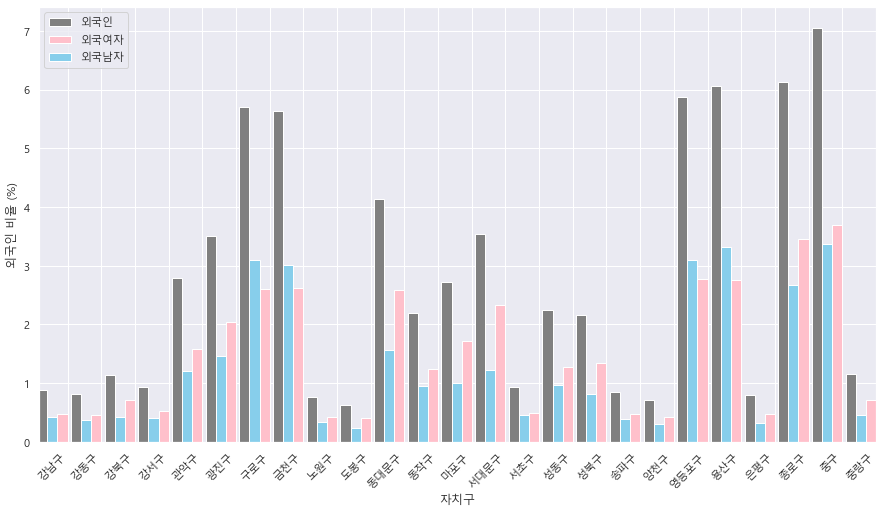

In [84]:
# 자치구로 그룹화
grouped = df_ins1.groupby('자치구')

# 각 그룹의 외국여자 비율과 외국남자 비율 계산
foreign = grouped['외국인'].sum() / grouped['총인구'].sum() * 100
foreign_women = grouped['외국여자'].sum() / grouped['총인구'].sum() * 100
foreign_men = grouped['외국남자'].sum() / grouped['총인구'].sum() * 100

# 그래프 그리기
plt.figure(figsize=(15,8))
foreign.plot(kind='bar', color='gray', position=3, width=0.3)
foreign_women.plot(kind='bar', color='pink', position=1, width=0.3)
foreign_men.plot(kind='bar', color='skyblue', position=2, width=0.3)
plt.xticks(rotation=45, ha='right')
plt.xlabel('자치구')
plt.ylabel('외국인 비율 (%)')
plt.legend(['외국인','외국여자', '외국남자'])
plt.show()

각 자치구의 특성에 따라 외국인 인구 비율이나 남성/여성 비율이 다르다


In [50]:
df_ins1

,자치구,외국여자,외국남자
3,종로구,5302,4107
4,중구,4856,4421
5,용산구,6513,7836
6,성동구,3721,2815
7,광진구,7224,5179
8,동대문구,9115,5495
9,중랑구,2769,1788
10,성북구,5944,3586
11,강북구,2149,1291
12,도봉구,1278,724


C:\Users\201910840\AppData\Local\Temp\ipykernel_9840\2995469047.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_ins1['자치구'], rotation=90) # x축 레이블 설정
C:\Users\201910840\AppData\Local\Temp\ipykernel_9840\2995469047.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_ins1['자치구'], rotation=90) # x축 레이블 설정


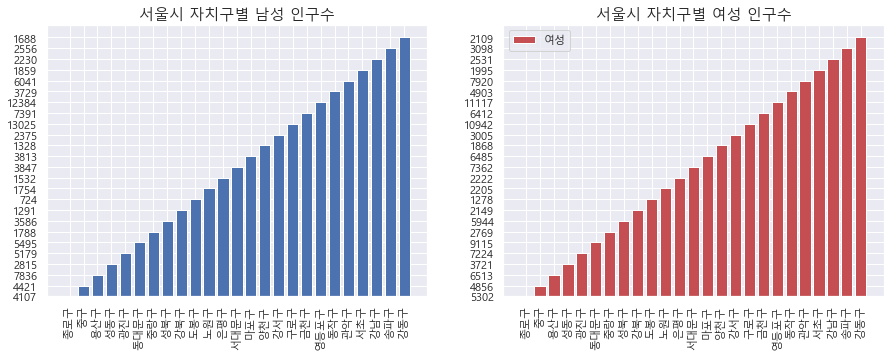

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# ax1에 남성 데이터 그리기
ax1.bar(x=df_ins1['자치구'], height=df_ins1['외국남자'], color='b', label='남성') 
ax1.set_title('서울시 자치구별 남성 인구수', fontsize=15) # 제목 설정
ax1.set_xticklabels(df_ins1['자치구'], rotation=90) # x축 레이블 설정

# ax2에 여성 데이터 그리기
ax2.bar(x=df_ins1['자치구'], height=df_ins1['외국여자'], color='r', label='여성') 
ax2.set_title('서울시 자치구별 여성 인구수', fontsize=15) # 제목 설정
ax2.set_xticklabels(df_ins1['자치구'], rotation=90) # x축 레이블 설정

plt.legend() # 범례 추가
plt.show()

구로구와 영등포구, 마포구는 총인구 수가 많지만 외국여성 인구 수도 많다는 것을 알 수 있다. 반면에 강북구와 도봉구는 총인구 수는 적지만 외국여성 인구 수도 적다는 것을 알 수 있다

<AxesSubplot:>

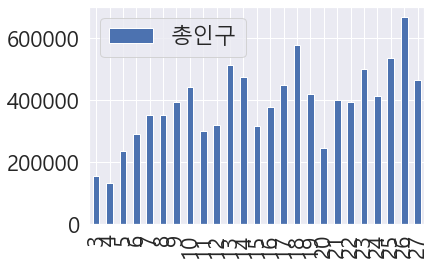

In [26]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid',
        font_scale = 2)

df_ins1.plot(kind='bar')

---